In [1]:
!pip install ultralytics
# !pip install sapiens-inferece

In [2]:
!git clone https://github.com/ibaiGorordo/Sapiens-Pytorch-Inference.git
!cd Sapiens-Pytorch-Inference
!pip install -r Sapiens-Pytorch-Inference/requirements.txt

fatal: destination path 'Sapiens-Pytorch-Inference' already exists and is not an empty directory.


In [3]:
!ls

gdrive	models	sample_data  Sapiens-Pytorch-Inference


In [4]:
!ls Sapiens-Pytorch-Inference

image_normal_estimation.py  models	    requirements.txt		webcam_normal_estimation.py
image_pose_estimation.py    notebooks	    sapiens_inference		webcam_predictor.py
image_predictor.py	    onnx_export.py  video_normal_estimation.py	webcam_segmentation.py
image_segmentation.py	    pyproject.toml  video_predictor.py
LICENSE			    README.md	    video_segmentation.py


In [5]:
from google.colab import drive
import os

drive.mount('/content/gdrive')
# # Define base folder path
base_path = '/content/gdrive/MyDrive/test_input'
image_path = os.path.join(base_path, 'image1.png')
output_path = os.path.join(base_path, 'Oimage1.png')


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


Segmentation inference took: 7.8063 seconds
Normal inference took: 3.8248 seconds
Result saved at /content/gdrive/MyDrive/test_input/Oimage1.png


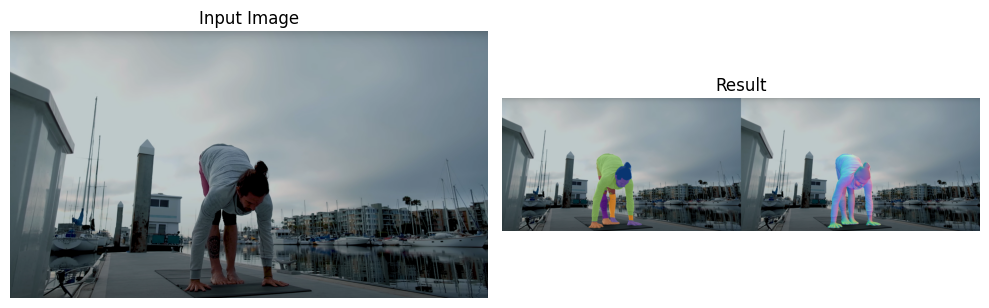

In [6]:
import sys
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np

# Add the root directory to sys.path
sys.path.append(os.path.abspath("Sapiens-Pytorch-Inference"))

# Import the required modules
from sapiens_inference import SapiensPredictor, SapiensConfig, SapiensDepthType, SapiensNormalType

# # Load the model
# config = SapiensConfig()
# # config.depth_type = SapiensDepthType.DEPTH_03B  # Uncomment if depth is needed
# config.normal_type = SapiensNormalType.NORMAL_1B  # Uncomment if normals are needed
# predictor = SapiensPredictor(config)

# Load the model configuration
config = SapiensConfig()
# config.depth_type = None  # Disable depth maps
config.normal_type = SapiensNormalType.NORMAL_1B  # Enable normal maps
config.segmentation = False  # Disable segmentation (explicitly set to False)

# Initialize the predictor
predictor = SapiensPredictor(config)

# Define the image path
# image_path = "path_to_your_image.png"  # Replace with your image path
img = cv2.imread(image_path)

# Check if the image was successfully loaded
if img is None:
    raise FileNotFoundError(f"Image not found at {image_path}")

# Convert the image to RGB for proper visualization
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Estimate the maps
result = predictor(img)

# Save the result
# output_path = "result.png"
cv2.imwrite(output_path, result)
print(f"Result saved at {output_path}")

# Display the result using matplotlib
plt.figure(figsize=(10, 5))

# Display input image
plt.subplot(1, 2, 1)
plt.imshow(img_rgb)
plt.title("Input Image")
plt.axis("off")

# Display the result
# Ensure the result is in the correct format for matplotlib
if result.ndim == 2:  # Grayscale output
    plt.subplot(1, 2, 2)
    plt.imshow(result, cmap="gray")
else:  # Color output
    result_rgb = cv2.cvtColor(result, cv2.COLOR_BGR2RGB)
    plt.subplot(1, 2, 2)
    plt.imshow(result_rgb)

plt.title("Result")
plt.axis("off")
plt.tight_layout()
plt.show()


Segmentation inference took: 7.2132 seconds
Normal inference took: 3.6558 seconds
Result saved at /content/gdrive/MyDrive/test_input/Oimage1.png


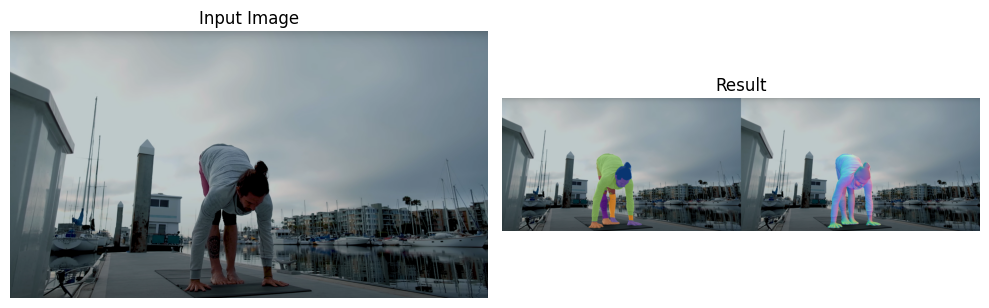

In [7]:
img = cv2.imread(image_path)

# Check if the image was successfully loaded
if img is None:
    raise FileNotFoundError(f"Image not found at {image_path}")

# Convert the image to RGB for proper visualization
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Estimate the maps
result = predictor(img)

# Save the result
# output_path = "result.png"
cv2.imwrite(output_path, result)
print(f"Result saved at {output_path}")

# Display the result using matplotlib
plt.figure(figsize=(10, 5))

# Display input image
plt.subplot(1, 2, 1)
plt.imshow(img_rgb)
plt.title("Input Image")
plt.axis("off")

# Display the result
# Ensure the result is in the correct format for matplotlib
if result.ndim == 2:  # Grayscale output
    plt.subplot(1, 2, 2)
    plt.imshow(result, cmap="gray")
else:  # Color output
    result_rgb = cv2.cvtColor(result, cv2.COLOR_BGR2RGB)
    plt.subplot(1, 2, 2)
    plt.imshow(result_rgb)

plt.title("Result")
plt.axis("off")
plt.tight_layout()
plt.show()

In [8]:
image_path = os.path.join(base_path, 'complex_pose.jpg')
output_path = os.path.join(base_path, 'Oimage2.png')

In [9]:
def get_output(predictor, image_path, output_path):
  img = cv2.imread(image_path)

  # Check if the image was successfully loaded
  if img is None:
      raise FileNotFoundError(f"Image not found at {image_path}")

  # Convert the image to RGB for proper visualization
  img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

  # Estimate the maps
  result = predictor(img)

  # Save the result
  # output_path = "result.png"
  cv2.imwrite(output_path, result)
  print(f"Result saved at {output_path}")

  # Display the result using matplotlib
  plt.figure(figsize=(10, 5))

  # Display input image
  plt.subplot(1, 2, 1)
  plt.imshow(img_rgb)
  plt.title("Input Image")
  plt.axis("off")

  # Display the result
  # Ensure the result is in the correct format for matplotlib
  if result.ndim == 2:  # Grayscale output
      plt.subplot(1, 2, 2)
      plt.imshow(result, cmap="gray")
  else:  # Color output
      result_rgb = cv2.cvtColor(result, cv2.COLOR_BGR2RGB)
      plt.subplot(1, 2, 2)
      plt.imshow(result_rgb)

  plt.title("Result")
  plt.axis("off")
  plt.tight_layout()
  plt.show()

Segmentation inference took: 3.4002 seconds
Normal inference took: 3.1203 seconds
Result saved at /content/gdrive/MyDrive/test_input/Oimage2.png


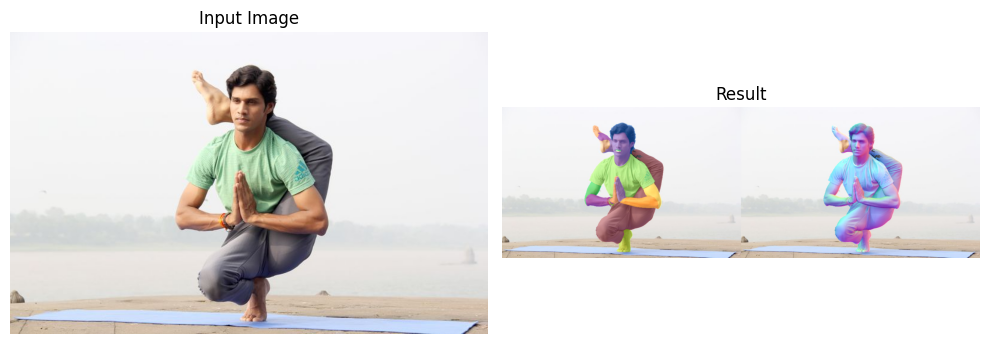

In [10]:
get_output(predictor, image_path, output_path)